# Disneyland Reviews Analysis

The aim of this project is to analyse the reviews given by visitors from different countries of the world using NLP to understand the sentiment of the reviews and classify using Sentiment Analysis metrics like Sentiment Polarity and VADER Polarity. This processed data is then feeded to different classifier models to get trained and predict the sentiment of the test reviews.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Datasets

In [2]:
with open(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Dataset/DisneylandReviews.csv') as f:
    print(f)

<_io.TextIOWrapper name='C:\\Users\\KIIT\\Documents\\LGM-Soc contributions\\Disneyland Reviews Analysis\\Dataset/DisneylandReviews.csv' mode='r' encoding='cp1252'>


In [3]:
df = pd.read_csv(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Dataset/DisneylandReviews.csv", encoding='cp1252', na_values = 'missing')

In [4]:
df

Review_ID  Rating Year_Month     Reviewer_Location  \
0      670772142       4     2019-4             Australia   
1      670682799       4     2019-5           Philippines   
2      670623270       4     2019-4  United Arab Emirates   
3      670607911       4     2019-4             Australia   
4      670607296       4     2019-4        United Kingdom   
...          ...     ...        ...                   ...   
42651    1765031       5        NaN        United Kingdom   
42652    1659553       5        NaN                Canada   
42653    1645894       5        NaN          South Africa   
42654    1618637       4        NaN         United States   
42655    1536786       4        NaN        United Kingdom   

                                             Review_Text               Branch  
0      If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1      Its been a while since d last time we visit HK...  Disneyland_HongKong  
2      Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3      HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4      the location is not in the city, took around 1...  Disneyland_HongKong  
...                                                  ...                  ...  
42651  i went to disneyland paris in july 03 and thou...     Disneyland_Paris  
42652  2 adults and 1 child of 11 visited Disneyland ...     Disneyland_Paris  
42653  My eleven year old daughter and myself went to...     Disneyland_Paris  
42654  This hotel, part of the Disneyland Paris compl...     Disneyland_Paris  
42655  I went to the Disneyparis resort, in 1996, wit...     Disneyland_Paris  

[42656 rows x 6 columns]

In [5]:
df.describe()

Review_ID        Rating
count  4.265600e+04  42656.000000
mean   3.188553e+08      4.217695
std    1.657092e+08      1.063371
min    1.398724e+06      1.000000
25%    1.743274e+08      4.000000
50%    2.907583e+08      5.000000
75%    4.489579e+08      5.000000
max    6.708014e+08      5.000000

In [6]:
df.shape

(42656, 6)

## Dealing with Null Values

In [7]:
df.isnull().sum()

Review_ID               0
Rating                  0
Year_Month           2613
Reviewer_Location       0
Review_Text             0
Branch                  0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

## Preprocessing the 'Review_ID	' column

In [10]:
df.Review_ID.nunique()

40023

In [11]:
df.Review_ID.value_counts()

121568004    2
129214104    2
164830205    2
168489234    2
121580686    2
            ..
293917263    1
278053453    1
639814220    1
126558105    1
322889295    1
Name: Review_ID, Length: 40023, dtype: int64

#### Removing duplicate labels

In [12]:
df.drop_duplicates(subset="Review_ID",inplace=True,keep='first')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40023 entries, 0 to 42117
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          40023 non-null  int64 
 1   Rating             40023 non-null  int64 
 2   Year_Month         40023 non-null  object
 3   Reviewer_Location  40023 non-null  object
 4   Review_Text        40023 non-null  object
 5   Branch             40023 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


## Preperocessing the 'Year_Month' column

In [14]:
timeline = df['Year_Month'].str.split('-')
timeline

0         [2019, 4]
1         [2019, 5]
2         [2019, 4]
3         [2019, 4]
4         [2019, 4]
            ...    
42113     [2011, 1]
42114     [2011, 1]
42115    [2010, 12]
42116    [2010, 12]
42117     [2010, 9]
Name: Year_Month, Length: 40023, dtype: object

In [15]:
df['Year'] = timeline.str[0]
df['Month'] = timeline.str[1]

In [16]:
df.drop(["Year_Month"], axis = 1, inplace = True)

In [17]:
df.head()

Review_ID  Rating     Reviewer_Location  \
0  670772142       4             Australia   
1  670682799       4           Philippines   
2  670623270       4  United Arab Emirates   
3  670607911       4             Australia   
4  670607296       4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year Month  
0  2019     4  
1  2019     5  
2  2019     4  
3  2019     4  
4  2019     4

### Visualization of the 'Year' column

In [18]:
year_viz1 = df.groupby('Year', as_index=False).agg({'Rating':'count'})

In [19]:
year_viz1

Year  Rating
0  2010     143
1  2011    1976
2  2012    4339
3  2013    4709
4  2014    5300
5  2015    6979
6  2016    6599
7  2017    5195
8  2018    3997
9  2019     786

<function matplotlib.pyplot.show(close=None, block=None)>

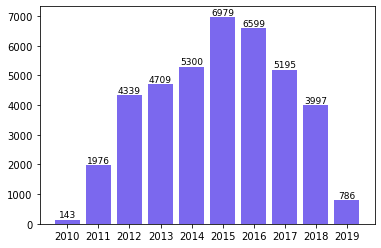

In [20]:
x = year_viz1['Year']
y = year_viz1['Rating']
plt.bar(x, y, color = 'mediumslateblue')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

<AxesSubplot:xlabel='Year', ylabel='count'>

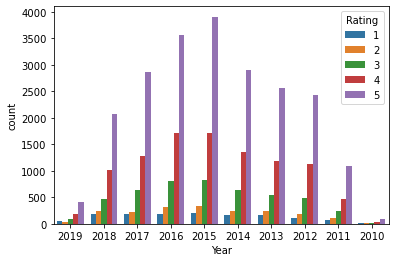

In [21]:
sns.countplot(data = df, x = 'Year', hue = 'Rating')

##### Plotting the average

<function matplotlib.pyplot.show(close=None, block=None)>

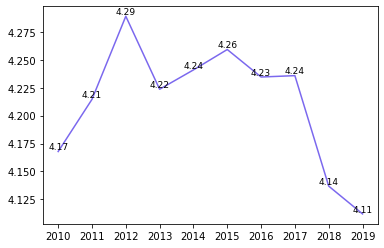

In [22]:
year_viz2 = df.groupby('Year', as_index=False).agg({'Rating':'mean'})

x = year_viz2['Year']
y = year_viz2['Rating']

plt.plot(x, y, color = 'mediumslateblue')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i],2),
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

### Visualization of the 'Month' column

In [23]:
month_viz1 = df.groupby('Month', as_index=False).agg({'Rating':'count'})

<function matplotlib.pyplot.show(close=None, block=None)>

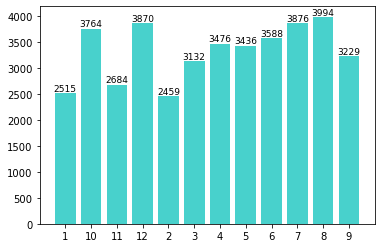

In [24]:
x = month_viz1['Month']
y = month_viz1['Rating']
plt.bar(x, y, color = 'mediumturquoise')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

<AxesSubplot:xlabel='Month', ylabel='count'>

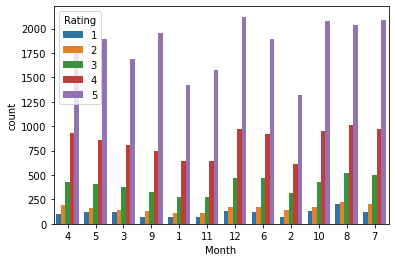

In [25]:
sns.countplot(data = df, x = 'Month', hue = 'Rating')

##### Plotting the average

<function matplotlib.pyplot.show(close=None, block=None)>

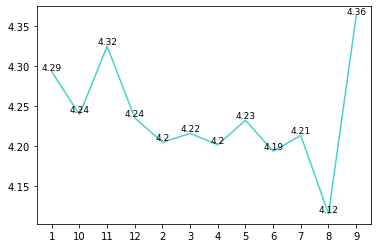

In [26]:
month_viz2 = df.groupby('Month', as_index=False).agg({'Rating':'mean'})

x = month_viz2['Month']
y = month_viz2['Rating']

plt.plot(x, y, color = 'mediumturquoise')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i],2),
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

## Preprocessing the 'Reviewer_Location' column

In [27]:
df.Reviewer_Location.nunique()

162

In [28]:
df.Reviewer_Location.value_counts()

United States               13513
United Kingdom               9115
Australia                    4409
Canada                       2115
India                        1469
                            ...  
Andorra                         1
Turks and Caicos Islands        1
Senegal                         1
Papua New Guinea                1
Cuba                            1
Name: Reviewer_Location, Length: 162, dtype: int64

### Visualization on the 'Reviewer_Location' column

In [29]:
reviewer_locs = df['Reviewer_Location'].value_counts()
r_locs = list(reviewer_locs.index)

In [30]:
r_locs

['United States',
 'United Kingdom',
 'Australia',
 'Canada',
 'India',
 'Philippines',
 'Singapore',
 'New Zealand',
 'Malaysia',
 'Hong Kong',
 'Indonesia',
 'Ireland',
 'United Arab Emirates',
 'Netherlands',
 'South Africa',
 'France',
 'Thailand',
 'Germany',
 'China',
 'Belgium',
 'Spain',
 'Switzerland',
 'Italy',
 'Mexico',
 'Saudi Arabia',
 'Israel',
 'Greece',
 'Portugal',
 'Norway',
 'Brazil',
 'Sweden',
 'Romania',
 'Denmark',
 'Malta',
 'Egypt',
 'Qatar',
 'Japan',
 'Finland',
 'Lebanon',
 'Vietnam',
 'Turkey',
 'Cyprus',
 'Russia',
 'Kuwait',
 'Bahrain',
 'South Korea',
 'Macau',
 'Sri Lanka',
 'Taiwan',
 'Mauritius',
 'Czechia',
 'Austria',
 'Iran',
 'Poland',
 'Argentina',
 'Pakistan',
 'Nigeria',
 'Hungary',
 'Oman',
 'Brunei',
 'Chile',
 'Puerto Rico',
 'Guam',
 'Croatia',
 'Kenya',
 'Bulgaria',
 'Jersey',
 'Luxembourg',
 'Peru',
 'Bangladesh',
 'Serbia',
 'Colombia',
 'Estonia',
 'Slovakia',
 'Costa Rica',
 'Guernsey',
 'Isle of Man',
 'Jordan',
 'Gibraltar',
 'Ukrai

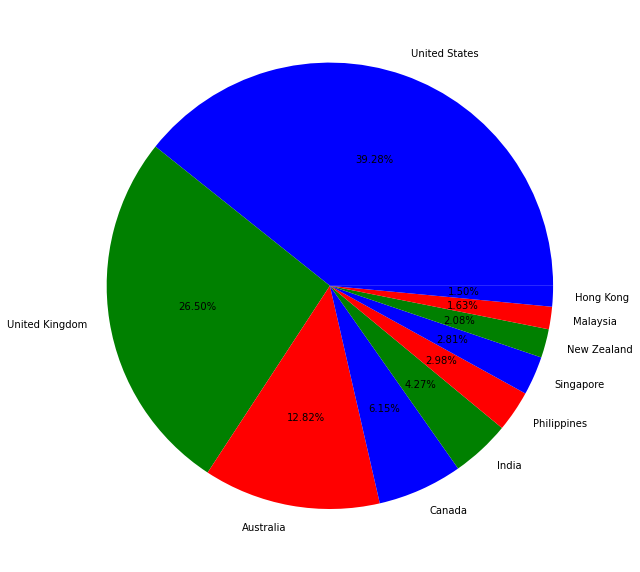

In [31]:
plt.figure(figsize=(10, 20))

figure = plt.pie(reviewer_locs.sort_values(ascending=False).iloc[:10],pctdistance=0.6,labeldistance=1.1,
                 colors='bgr',labels=r_locs[:10],autopct='%1.2f%%')

In [32]:
import plotly.express as px

In [33]:
rlocs_viz = df.groupby('Reviewer_Location', as_index=False).agg({'Rating':'mean'}).sort_values('Rating', ascending=False)

In [34]:
rlocs_viz 

Reviewer_Location    Rating
81                      Libya  5.000000
23      Caribbean Netherlands  5.000000
31                       Cuba  5.000000
32                    Curaçao  5.000000
43                   Ethiopia  5.000000
..                        ...       ...
39                    Ecuador  2.333333
147  Turks and Caicos Islands  2.000000
3                     Andorra  2.000000
132               South Sudan  2.000000
136                  Suriname  2.000000

[162 rows x 2 columns]

In [35]:
fig = px.choropleth(rlocs_viz, 
                    locations = 'Reviewer_Location', 
                    locationmode = 'country names', 
                    color = 'Rating',
                    hover_data = ['Rating'], 
                    title = 'Average Reviewer Countries')
fig.show()

## Preprocessing 'Review_Text' column and extracting the useful words

In [36]:
df.reset_index(inplace=True)

In [37]:
df.shape

(40023, 8)

In [38]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
import re

In [39]:
df['Review_Text'][7]

"Think of it as an intro to Disney magic for the little ones. Almost all of the attractions can be completed in 1.5days.One drawback was the timing. For example, Disney's Storybook Theatre is closed Wed Thu for private events. Some restaurants close mid week Tue Thur as well. So best not to plan your visit during mid week.The biggest disappointment is the food at the Park. Even Maxim's is so so only. The only decent Restaurant is Main Street Corner Cafe and the Main Street Bakery. And do be prepared for the typical abrupt HongKong style service from the serving staff."

##### Removing the punctuations

In [40]:
new_review1 = []
for i in range(len(df['Review_Text'])):
    review1=re.sub('[^a-zA-Z]', ' ', df['Review_Text'][i])
    new_review1.append(review1)

In [41]:
new_review1[7]

'Think of it as an intro to Disney magic for the little ones  Almost all of the attractions can be completed in    days One drawback was the timing  For example  Disney s Storybook Theatre is closed Wed Thu for private events  Some restaurants close mid week Tue Thur as well  So best not to plan your visit during mid week The biggest disappointment is the food at the Park  Even Maxim s is so so only  The only decent Restaurant is Main Street Corner Cafe and the Main Street Bakery  And do be prepared for the typical abrupt HongKong style service from the serving staff '

##### Removing the spaces 

In [42]:
new_review2 = []
for i in range(len(new_review1)):
    review2=new_review1[i].strip()
    new_review2.append(review2)

In [43]:
new_review2[7]

'Think of it as an intro to Disney magic for the little ones  Almost all of the attractions can be completed in    days One drawback was the timing  For example  Disney s Storybook Theatre is closed Wed Thu for private events  Some restaurants close mid week Tue Thur as well  So best not to plan your visit during mid week The biggest disappointment is the food at the Park  Even Maxim s is so so only  The only decent Restaurant is Main Street Corner Cafe and the Main Street Bakery  And do be prepared for the typical abrupt HongKong style service from the serving staff'

##### Setting all words to Lower Case

In [44]:
new_review3 = []
for i in range(len(new_review2)):
    review3=new_review2[i].lower()
    new_review3.append(review3)

In [45]:
new_review3[7]

'think of it as an intro to disney magic for the little ones  almost all of the attractions can be completed in    days one drawback was the timing  for example  disney s storybook theatre is closed wed thu for private events  some restaurants close mid week tue thur as well  so best not to plan your visit during mid week the biggest disappointment is the food at the park  even maxim s is so so only  the only decent restaurant is main street corner cafe and the main street bakery  and do be prepared for the typical abrupt hongkong style service from the serving staff'

##### Removing the stopwords

In [46]:
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation
name = ['disney', 'disneyland', 'iron', 'ironman', 'mickey', 'buz', 'hk', 'california', 'paris', 'hongkong']

new_review4 = []

for i in new_review3:
    sentence = i.split()
    s_p=[]
    for cor in sentence:
        if cor not in stop_words and cor not in punctuation and cor not in name:
            s_p.append(cor)
    s_p=" ".join(s_p)    
    new_review4.append(s_p)

In [47]:
new_review4[7]

'think intro magic little ones almost attractions completed days one drawback timing example storybook theatre closed wed thu private events restaurants close mid week tue thur well best plan visit mid week biggest disappointment food park even maxim decent restaurant main street corner cafe main street bakery prepared typical abrupt style service serving staff'

#### Performing stemming on the raw extracted text

In [48]:
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    new_review5 = [stemmer.stem(t) for t in new_review4]

In [49]:
new_review5[7]

'think intro magic little ones almost attractions completed days one drawback timing example storybook theatre closed wed thu private events restaurants close mid week tue thur well best plan visit mid week biggest disappointment food park even maxim decent restaurant main street corner cafe main street bakery prepared typical abrupt style service serving staff'

##### Lemmatization of the extracted text

In [50]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [53]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

n=WordNetLemmatizer()
new_review6=[]
for i in range(len(new_review5)):
    words=word_tokenize(new_review5[i])
    lem_word=[]
    for w in words:
        lemm=n.lemmatize(w)
        lem_word.append(lemm)
    ps_tg=pos_tag(lem_word)
    new_review6.append(ps_tg)

In [54]:
new_review6[7]

[('think', 'VB'),
 ('intro', 'JJ'),
 ('magic', 'JJ'),
 ('little', 'JJ'),
 ('one', 'CD'),
 ('almost', 'RB'),
 ('attraction', 'NN'),
 ('completed', 'VBD'),
 ('day', 'NN'),
 ('one', 'CD'),
 ('drawback', 'NN'),
 ('timing', 'NN'),
 ('example', 'NN'),
 ('storybook', 'NN'),
 ('theatre', 'NN'),
 ('closed', 'VBD'),
 ('wed', 'VBN'),
 ('thu', 'JJ'),
 ('private', 'JJ'),
 ('event', 'NN'),
 ('restaurant', 'NN'),
 ('close', 'RB'),
 ('mid', 'JJ'),
 ('week', 'NN'),
 ('tue', 'NN'),
 ('thur', 'RB'),
 ('well', 'RB'),
 ('best', 'JJS'),
 ('plan', 'NN'),
 ('visit', 'NN'),
 ('mid', 'JJ'),
 ('week', 'NN'),
 ('biggest', 'JJS'),
 ('disappointment', 'NN'),
 ('food', 'NN'),
 ('park', 'NN'),
 ('even', 'RB'),
 ('maxim', 'RBR'),
 ('decent', 'JJ'),
 ('restaurant', 'NN'),
 ('main', 'JJ'),
 ('street', 'NN'),
 ('corner', 'NN'),
 ('cafe', 'JJ'),
 ('main', 'JJ'),
 ('street', 'NN'),
 ('bakery', 'NN'),
 ('prepared', 'VBD'),
 ('typical', 'JJ'),
 ('abrupt', 'JJ'),
 ('style', 'NN'),
 ('service', 'NN'),
 ('serving', 'VBG'),
 ('s

##### Extraction of key concentration phrases

In [55]:
new_review7=[]
for i in new_review6:
    a=[]
    for j in i:
        if (j[1]=='NN' or j[1]=='NNP' or j[1]=='NNS' or j[1]=='NNPS' or j[1]=='VB'or j[1]=='VBD'or j[1]=='VBG'or j[1]=='VBN'or j[1]=='VBP'or j[1]=='VBZ'or j[1]=='VH'or j[1]=='VHD'or j[1]=='VHG'or j[1]=='VHN'or j[1]=='VHP'or j[1]=='VHZ'or j[1]=='VV'or j[1]=='VVD'or j[1]=='VVG'or j[1]=='VVN'or j[1]=='VVP'or j[1]=='VVZ'or j[1]=='JJ'or j[1]=='JJR'or j[1]=='JJS'or j[1]=='RB'or j[1]=='RBR'or j[1]=='RBS'):
            a.append(j[0])
    new_review7.append(a)

In [56]:
new_review7[7]

['think',
 'intro',
 'magic',
 'little',
 'almost',
 'attraction',
 'completed',
 'day',
 'drawback',
 'timing',
 'example',
 'storybook',
 'theatre',
 'closed',
 'wed',
 'thu',
 'private',
 'event',
 'restaurant',
 'close',
 'mid',
 'week',
 'tue',
 'thur',
 'well',
 'best',
 'plan',
 'visit',
 'mid',
 'week',
 'biggest',
 'disappointment',
 'food',
 'park',
 'even',
 'maxim',
 'decent',
 'restaurant',
 'main',
 'street',
 'corner',
 'cafe',
 'main',
 'street',
 'bakery',
 'prepared',
 'typical',
 'abrupt',
 'style',
 'service',
 'serving',
 'staff']

##### Concatenating these concentration phrases

In [57]:
text=[]
for i in new_review7 :
    lem_join=" ".join(i)
    text.append(lem_join)

In [58]:
text[7]

'think intro magic little almost attraction completed day drawback timing example storybook theatre closed wed thu private event restaurant close mid week tue thur well best plan visit mid week biggest disappointment food park even maxim decent restaurant main street corner cafe main street bakery prepared typical abrupt style service serving staff'

In [59]:
df["Extracted_review"] = text

In [60]:
df

index  Review_ID  Rating     Reviewer_Location  \
0          0  670772142       4             Australia   
1          1  670682799       4           Philippines   
2          2  670623270       4  United Arab Emirates   
3          3  670607911       4             Australia   
4          4  670607296       4        United Kingdom   
...      ...        ...     ...                   ...   
40018  42113   92198076       4        United Kingdom   
40019  42114   92061774       4               Germany   
40020  42115   91995748       1        United Kingdom   
40021  42116   91984642       2        United Kingdom   
40022  42117   91827418       5        United Kingdom   

                                             Review_Text               Branch  \
0      If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1      Its been a while since d last time we visit HK...  Disneyland_HongKong   
2      Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3      HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4      the location is not in the city, took around 1...  Disneyland_HongKong   
...                                                  ...                  ...   
40018  Although our pick up was prompt the taxi drive...     Disneyland_Paris   
40019  Just returned from a 4 days family trip to Dis...     Disneyland_Paris   
40020  We spent the 20 Dec 2010 in the Disney park an...     Disneyland_Paris   
40021  Well I was really looking forward to this trip...     Disneyland_Paris   
40022  If staying at a Disney hotel make good use of ...     Disneyland_Paris   

       Year Month                                   Extracted_review  
0      2019     4  ever anywhere find hong kong similar layout wa...  
1      2019     5  last time visit yet time stay tomorrowland aka...  
2      2019     4  thanks god hot humid visiting park otherwise b...  
3      2019     4  great compact park unfortunately quite bit mai...  
4      2019     4  location city took hour kowlon kid much everyt...  
...     ...   ...                                                ...  
40018  2011     1  pick prompt taxi driver wasnt sure time pickin...  
40019  2011     1  returned day family trip boy aged reading prev...  
40020  2010    12  spent dec park lunchtime attraction starting c...  
40021  2010    12  well really looking forward trip christmas per...  
40022  2010     9  staying hotel make good use extra hour fast pa...  

[40023 rows x 9 columns]

## Preprocessing the 'Branch' column

In [61]:
df.Branch.nunique()

3

In [62]:
df.Branch.value_counts()

Disneyland_California    18196
Disneyland_Paris         12693
Disneyland_HongKong       9134
Name: Branch, dtype: int64

In [63]:
df['Branch'] = df['Branch'].str.slice(start=11)

In [64]:
df

index  Review_ID  Rating     Reviewer_Location  \
0          0  670772142       4             Australia   
1          1  670682799       4           Philippines   
2          2  670623270       4  United Arab Emirates   
3          3  670607911       4             Australia   
4          4  670607296       4        United Kingdom   
...      ...        ...     ...                   ...   
40018  42113   92198076       4        United Kingdom   
40019  42114   92061774       4               Germany   
40020  42115   91995748       1        United Kingdom   
40021  42116   91984642       2        United Kingdom   
40022  42117   91827418       5        United Kingdom   

                                             Review_Text    Branch  Year  \
0      If you've ever been to Disneyland anywhere you...  HongKong  2019   
1      Its been a while since d last time we visit HK...  HongKong  2019   
2      Thanks God it wasn   t too hot or too humid wh...  HongKong  2019   
3      HK Disneyland is a great compact park. Unfortu...  HongKong  2019   
4      the location is not in the city, took around 1...  HongKong  2019   
...                                                  ...       ...   ...   
40018  Although our pick up was prompt the taxi drive...     Paris  2011   
40019  Just returned from a 4 days family trip to Dis...     Paris  2011   
40020  We spent the 20 Dec 2010 in the Disney park an...     Paris  2010   
40021  Well I was really looking forward to this trip...     Paris  2010   
40022  If staying at a Disney hotel make good use of ...     Paris  2010   

      Month                                   Extracted_review  
0         4  ever anywhere find hong kong similar layout wa...  
1         5  last time visit yet time stay tomorrowland aka...  
2         4  thanks god hot humid visiting park otherwise b...  
3         4  great compact park unfortunately quite bit mai...  
4         4  location city took hour kowlon kid much everyt...  
...     ...                                                ...  
40018     1  pick prompt taxi driver wasnt sure time pickin...  
40019     1  returned day family trip boy aged reading prev...  
40020    12  spent dec park lunchtime attraction starting c...  
40021    12  well really looking forward trip christmas per...  
40022     9  staying hotel make good use extra hour fast pa...  

[40023 rows x 9 columns]

### Visualization of the labels in the 'Branch' column

<AxesSubplot:xlabel='Branch', ylabel='count'>

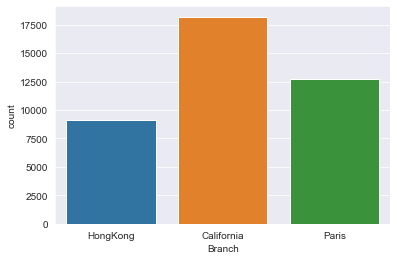

In [65]:
sns.set_style("darkgrid")
sns.countplot(x="Branch", data=df)

In [66]:
colors = ['#00c585', '#005228',  '#941421', '#ffb500', '#09b9b7' ]

In [67]:
df["Branch"].value_counts()

California    18196
Paris         12693
HongKong       9134
Name: Branch, dtype: int64

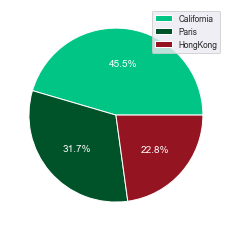

In [68]:
plt.pie(x = df["Branch"].value_counts(),  
        autopct='%1.1f%%', textprops=dict(color='white'), colors = colors)
plt.legend(df["Branch"].value_counts().index, loc='upper right', fontsize = "small")
plt.show()

### Performing One Hot Encoding on the 'Branches' column

In [69]:
location = pd.get_dummies(df['Branch'])
location

California  HongKong  Paris
0               0         1      0
1               0         1      0
2               0         1      0
3               0         1      0
4               0         1      0
...           ...       ...    ...
40018           0         0      1
40019           0         0      1
40020           0         0      1
40021           0         0      1
40022           0         0      1

[40023 rows x 3 columns]

In [70]:
df = pd.concat([df,location],axis=1)

In [71]:
df

index  Review_ID  Rating     Reviewer_Location  \
0          0  670772142       4             Australia   
1          1  670682799       4           Philippines   
2          2  670623270       4  United Arab Emirates   
3          3  670607911       4             Australia   
4          4  670607296       4        United Kingdom   
...      ...        ...     ...                   ...   
40018  42113   92198076       4        United Kingdom   
40019  42114   92061774       4               Germany   
40020  42115   91995748       1        United Kingdom   
40021  42116   91984642       2        United Kingdom   
40022  42117   91827418       5        United Kingdom   

                                             Review_Text    Branch  Year  \
0      If you've ever been to Disneyland anywhere you...  HongKong  2019   
1      Its been a while since d last time we visit HK...  HongKong  2019   
2      Thanks God it wasn   t too hot or too humid wh...  HongKong  2019   
3      HK Disneyland is a great compact park. Unfortu...  HongKong  2019   
4      the location is not in the city, took around 1...  HongKong  2019   
...                                                  ...       ...   ...   
40018  Although our pick up was prompt the taxi drive...     Paris  2011   
40019  Just returned from a 4 days family trip to Dis...     Paris  2011   
40020  We spent the 20 Dec 2010 in the Disney park an...     Paris  2010   
40021  Well I was really looking forward to this trip...     Paris  2010   
40022  If staying at a Disney hotel make good use of ...     Paris  2010   

      Month                                   Extracted_review  California  \
0         4  ever anywhere find hong kong similar layout wa...           0   
1         5  last time visit yet time stay tomorrowland aka...           0   
2         4  thanks god hot humid visiting park otherwise b...           0   
3         4  great compact park unfortunately quite bit mai...           0   
4         4  location city took hour kowlon kid much everyt...           0   
...     ...                                                ...         ...   
40018     1  pick prompt taxi driver wasnt sure time pickin...           0   
40019     1  returned day family trip boy aged reading prev...           0   
40020    12  spent dec park lunchtime attraction starting c...           0   
40021    12  well really looking forward trip christmas per...           0   
40022     9  staying hotel make good use extra hour fast pa...           0   

       HongKong  Paris  
0             1      0  
1             1      0  
2             1      0  
3             1      0  
4             1      0  
...         ...    ...  
40018         0      1  
40019         0      1  
40020         0      1  
40021         0      1  
40022         0      1  

[40023 rows x 12 columns]

### Visualization and data analysis of the 'Rating' column 

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

In [73]:
colors = ['#00c585', '#005228',  '#941421', '#ffb500', '#09b9b7' ]

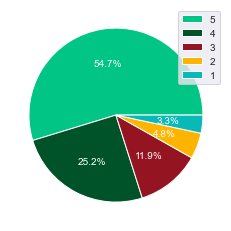

In [74]:
ratings = df["Rating"].value_counts()

plt.pie(x = ratings, autopct='%1.1f%%', textprops=dict(color='white'), colors = colors)
plt.legend(labels = ratings.index)

plt.show()

In [75]:
ratings

5    21899
4    10079
3     4778
2     1929
1     1338
Name: Rating, dtype: int64

In [76]:
img1 = np.array(Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Images/image_one.png"))
img2 = np.array(Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Images/image_two.png"))
img3 = np.array(Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Images/image_three.png"))
img4 = np.array(Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Images/image_four.png"))
img5 = np.array(Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Images/image_five.png"))

### WordCloud of Rating = 1

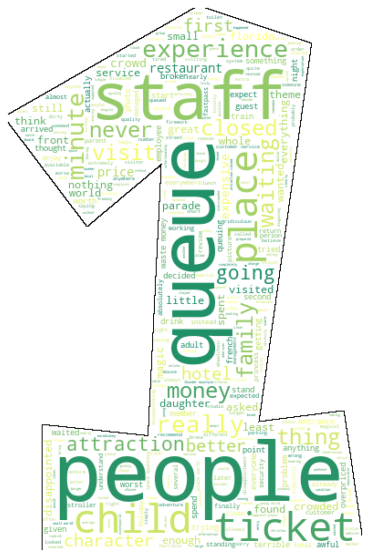

In [77]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img1, background_color='white',
               max_words = 1000 , width = 500 , height = 400, min_word_length = 5, 
               contour_width = 1, contour_color = 'black', colormap = "summer").generate(" ".join(df[df.Rating == 1].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### WordCloud of Rating = 2

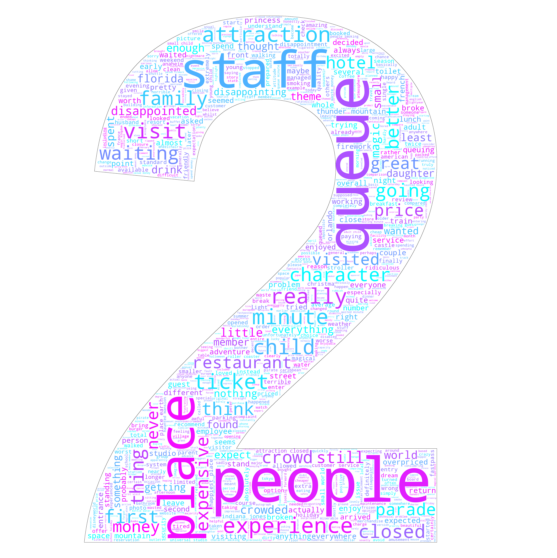

In [78]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img2, background_color='white',
               max_words = 1000 , width = 500 , height = 400, min_word_length = 5, 
               contour_width = 1, contour_color = 'black', colormap = "cool").generate(" ".join(df[df.Rating == 2].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### WordCloud of Rating = 3

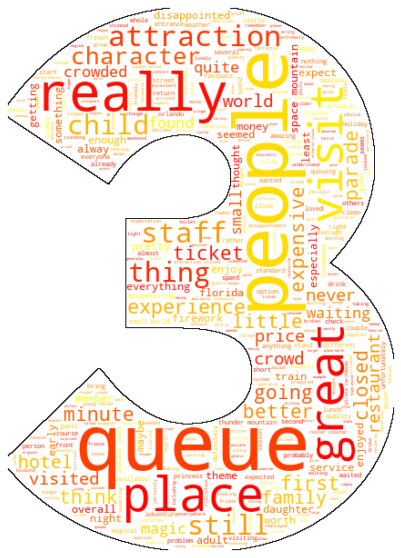

In [79]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img3, background_color='white',
               max_words = 1000 , width = 500 , height = 400, min_word_length = 5, 
               contour_width = 1, contour_color = 'black', colormap = "autumn").generate(" ".join(df[df.Rating == 3].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

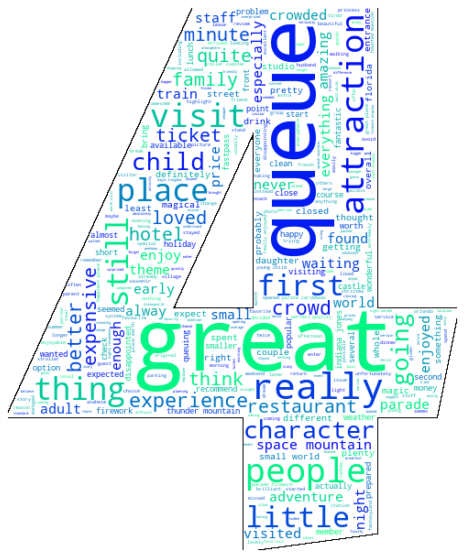

In [80]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img4, background_color='white',
               max_words = 1000 , width = 500 , height = 400, min_word_length = 5, 
               contour_width = 1, contour_color = 'black', colormap = "winter").generate(" ".join(df[df.Rating == 4].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### WordCloud of Rating = 5

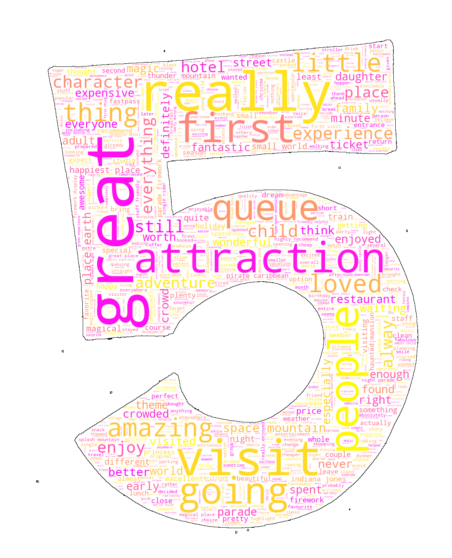

In [81]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = img5, background_color='white',
               max_words = 1000 , width = 500 , height = 400, min_word_length = 5, 
               contour_width = 1, contour_color = 'black', colormap = "spring").generate(" ".join(df[df.Rating == 5].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### Visualization of Rating with respect to different Branches of Disneyland 

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

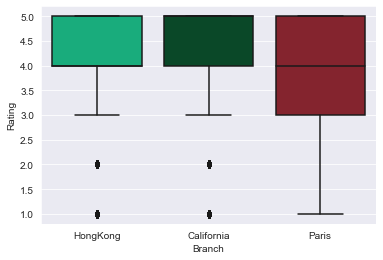

In [82]:
sns.set_palette(colors)
sns.boxplot(y = df['Rating'], x = df['Branch'])

Text(0.5, 1.0, 'Paris')

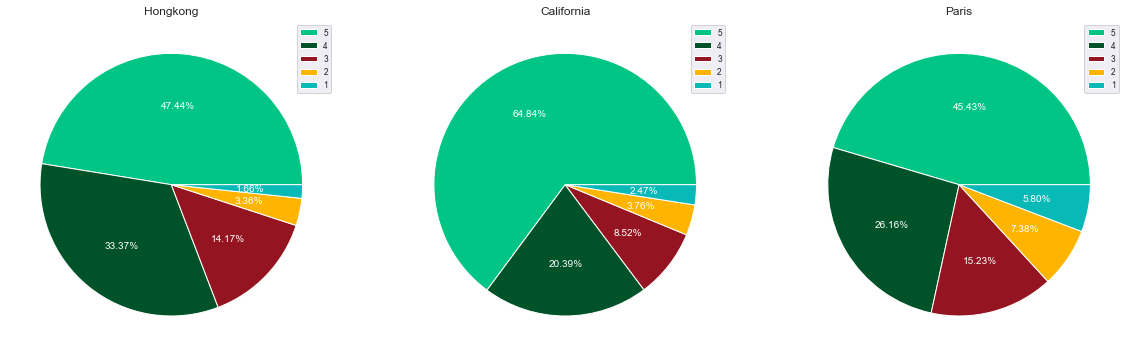

In [83]:
hong = df.loc[df["Branch"] == "HongKong"]
hong_star = hong['Rating'].value_counts()

cal = df.loc[df["Branch"] == "California"]
cal_star = cal['Rating'].value_counts()

par = df.loc[df["Branch"] == "Paris"]
par_star = par['Rating'].value_counts()

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

ax[0].pie(x = hong_star, labels = hong_star.index, autopct='%1.2f%%', textprops=dict(color='white'), colors = colors)
ax[0].legend(hong_star.index, loc='upper right', fontsize = "small")
ax[0].set_title("Hongkong")

ax[1].pie(x = cal_star, labels = cal_star.index, autopct='%1.2f%%', textprops=dict(color='white'), colors = colors)
ax[1].legend(cal_star.index, loc='upper right', fontsize = "small")
ax[1].set_title("California")

ax[2].pie(x = par_star, labels = par_star.index, autopct='%1.2f%%', textprops=dict(color='white'), colors = colors)
ax[2].legend(par_star.index, loc='upper right', fontsize = "small")
ax[2].set_title("Paris")

##### Plotting the average rating in each Branch

<function matplotlib.pyplot.show(close=None, block=None)>

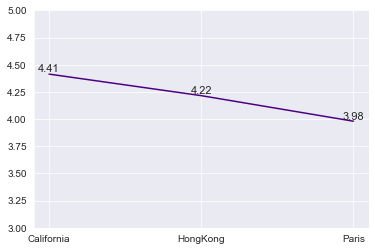

In [84]:
branch_rating = df.groupby('Branch', as_index=False).agg({'Rating':'mean'})

x = branch_rating['Branch']
y = branch_rating['Rating']

plt.plot(x, y, color = 'indigo')
plt.ylim(3,5)
for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i],2),
             fontsize = 11,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

In [85]:
branch_rating

Branch    Rating
0  California  4.413717
1    HongKong  4.215568
2       Paris  3.980462

## Creating WordClouds of all the Branches 

In [86]:
california = np.array(Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Images/california.png"))
hongkong = np.array(Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Images/hongkong.png"))
paris = np.array(Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Images/paris.png"))

### WordCloud of 'California' Branch

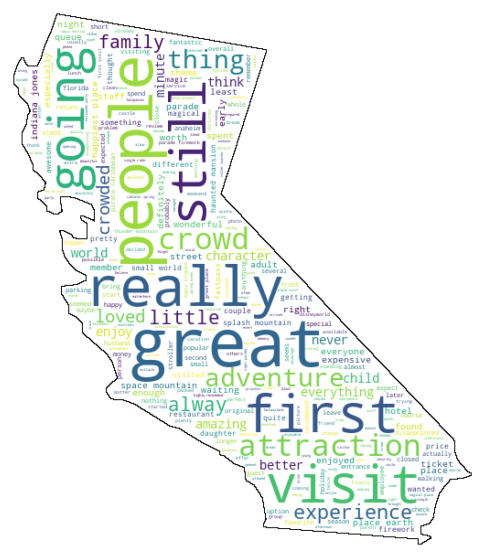

In [87]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = california, background_color='white',
               max_words = 1000 , width = 500 , height = 400, min_word_length = 5, 
               contour_width = 1, contour_color = 'black', colormap = "viridis").generate(" ".join(df[df.Branch == 'California'].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### WordCloud of 'HongKong' Branch

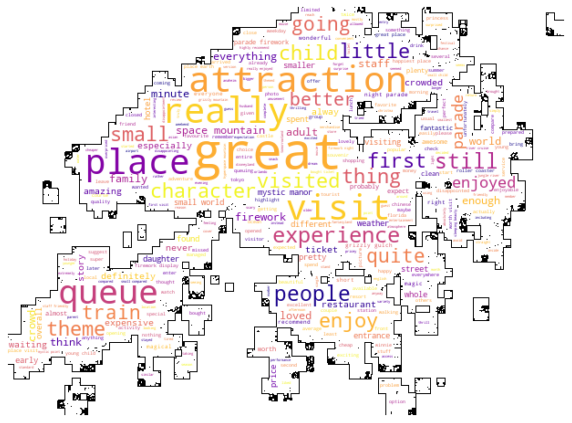

In [88]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = hongkong, background_color='white',
               max_words = 1000 , width = 500 , height = 400, min_word_length = 5, 
               contour_width = 1, contour_color = 'black', colormap = "plasma").generate(" ".join(df[df.Branch == 'HongKong'].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### WordCloud of 'Paris' Branch

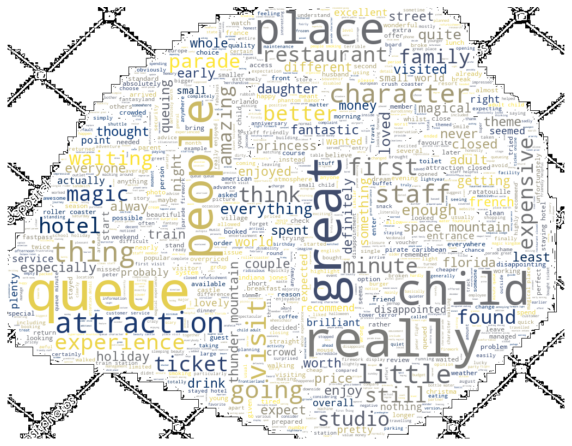

In [89]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = paris, background_color='white',
               max_words = 1000 , width = 500 , height = 400, min_word_length = 5, 
               contour_width = 1, contour_color = 'black', colormap = "cividis").generate(" ".join(df[df.Branch == 'Paris'].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

## Visualization of the Correlation between different Branches and Reviewers Location.

#### From here we can analyse people of which countries prefer which Disneyland Branch

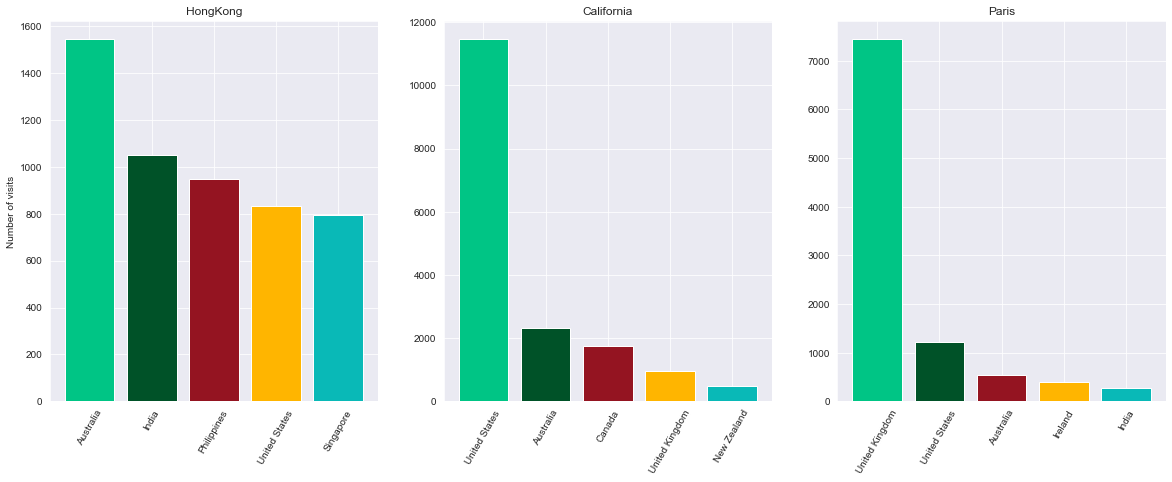

In [90]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

hong_loc = df[df["Branch"] == "HongKong"]["Reviewer_Location"].value_counts()[:5]
cal_loc = df.loc[df["Branch"] == "California"]["Reviewer_Location"].value_counts()[:5]
par_loc = df.loc[df["Branch"] == "Paris"]["Reviewer_Location"].value_counts()[:5]

ax[0].bar(hong_loc.index, hong_loc.values, color = colors)
ax[0].set_ylabel('Number of visits')
ax[0].set_title("HongKong")
ax[0].tick_params(axis = 'x', rotation = 60)

ax[1].bar(cal_loc.index, cal_loc.values, color = colors)
ax[1].set_title("California")
ax[1].tick_params(axis = 'x', rotation = 60)

ax[2].bar(par_loc.index, par_loc.values, color = colors)
ax[2].set_title("Paris")
ax[2].tick_params(axis = 'x', rotation = 60)

#### HongKong Branch - most visited by people of Australia

#### California Branch - most visited by people of United States

#### Paris Branch - most visited by people of United Kingdom

## Sentiment Analysis to predict the sentiment of reviews

### Sentiment metric:

- If Rating is 5 or 4 -->  Positive Sentiment

- If Rating is 3  -->  Intermediate Sentiment

- If Rating is 2 or 1  -->  Nagetive Sentiment

In [91]:
positive = np.array(Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Images/positive.png"))
nagetive = np.array(Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Images/nagetive.png"))
intermediate = np.array(Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Disneyland Reviews Analysis\Images/intermediate.png"))

### WordCloud of Positive Sentiments

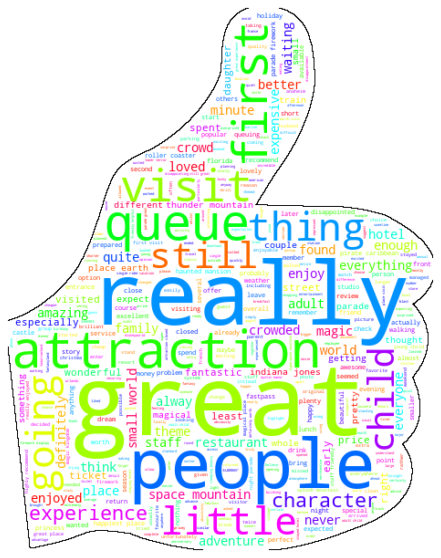

In [92]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = positive, background_color='white',
               max_words = 1000 , width = 500 , height = 400, min_word_length = 5, 
               contour_width = 1, contour_color = 'black', colormap = "hsv").generate(" ".join(df[df.Rating >= 3].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### WordCloud of Nagetive Sentiments

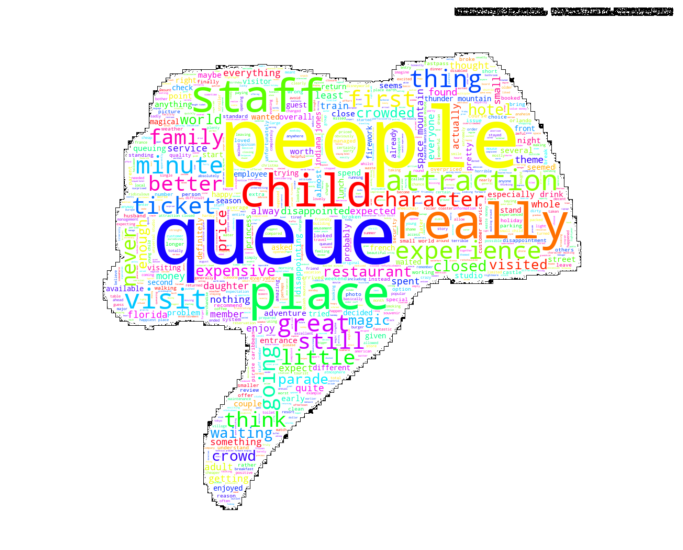

In [93]:
plt.figure(figsize = (12,12))
Wc = WordCloud(mask = nagetive, background_color='white',
               max_words = 1000 , width = 500 , height = 400, min_word_length = 5, 
               contour_width = 1, contour_color = 'black', colormap = "hsv").generate(" ".join(df[df.Rating <= 3].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

### WordCloud of Intermediate Sentiments

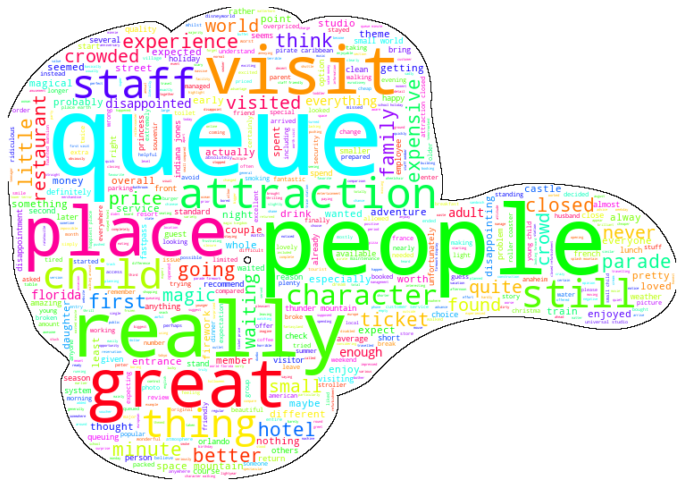

In [94]:
plt.figure(figsize = (12,12))
Wc = WordCloud(mask = intermediate, background_color='white',
               max_words = 1000 , width = 500 , height = 400, min_word_length = 5, 
               contour_width = 1, contour_color = 'black', colormap = "hsv").generate(" ".join(df[df.Rating == 3].Extracted_review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

## Finding the Sentiment Polarity of the reviews

In [95]:
S_Polarity = []
for i in df["Rating"]:
    if i > 3:
        S_Polarity.append('positive')
    elif i < 3:
        S_Polarity.append('negative')
    else:
        S_Polarity.append('neutral')

In [96]:
df["S_Polarity"] = S_Polarity

In [97]:
df

index  Review_ID  Rating     Reviewer_Location  \
0          0  670772142       4             Australia   
1          1  670682799       4           Philippines   
2          2  670623270       4  United Arab Emirates   
3          3  670607911       4             Australia   
4          4  670607296       4        United Kingdom   
...      ...        ...     ...                   ...   
40018  42113   92198076       4        United Kingdom   
40019  42114   92061774       4               Germany   
40020  42115   91995748       1        United Kingdom   
40021  42116   91984642       2        United Kingdom   
40022  42117   91827418       5        United Kingdom   

                                             Review_Text    Branch  Year  \
0      If you've ever been to Disneyland anywhere you...  HongKong  2019   
1      Its been a while since d last time we visit HK...  HongKong  2019   
2      Thanks God it wasn   t too hot or too humid wh...  HongKong  2019   
3      HK Disneyland is a great compact park. Unfortu...  HongKong  2019   
4      the location is not in the city, took around 1...  HongKong  2019   
...                                                  ...       ...   ...   
40018  Although our pick up was prompt the taxi drive...     Paris  2011   
40019  Just returned from a 4 days family trip to Dis...     Paris  2011   
40020  We spent the 20 Dec 2010 in the Disney park an...     Paris  2010   
40021  Well I was really looking forward to this trip...     Paris  2010   
40022  If staying at a Disney hotel make good use of ...     Paris  2010   

      Month                                   Extracted_review  California  \
0         4  ever anywhere find hong kong similar layout wa...           0   
1         5  last time visit yet time stay tomorrowland aka...           0   
2         4  thanks god hot humid visiting park otherwise b...           0   
3         4  great compact park unfortunately quite bit mai...           0   
4         4  location city took hour kowlon kid much everyt...           0   
...     ...                                                ...         ...   
40018     1  pick prompt taxi driver wasnt sure time pickin...           0   
40019     1  returned day family trip boy aged reading prev...           0   
40020    12  spent dec park lunchtime attraction starting c...           0   
40021    12  well really looking forward trip christmas per...           0   
40022     9  staying hotel make good use extra hour fast pa...           0   

       HongKong  Paris S_Polarity  
0             1      0   positive  
1             1      0   positive  
2             1      0   positive  
3             1      0   positive  
4             1      0   positive  
...         ...    ...        ...  
40018         0      1   positive  
40019         0      1   positive  
40020         0      1   negative  
40021         0      1   negative  
40022         0      1   positive  

[40023 rows x 13 columns]

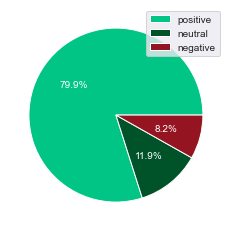

In [98]:
ratings = df["S_Polarity"].value_counts()

plt.pie(x = ratings,
       autopct='%1.1f%%', textprops=dict(color='white'))
plt.legend(labels = ratings.index)

plt.show()

## Lexicon based approach of Sentiment Analysis

### Getting the VADER score

In [99]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [100]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti_analyzer=SentimentIntensityAnalyzer()

In [101]:
df['Rating'][7]

3

In [102]:
df['Extracted_review'][7]

'think intro magic little almost attraction completed day drawback timing example storybook theatre closed wed thu private event restaurant close mid week tue thur well best plan visit mid week biggest disappointment food park even maxim decent restaurant main street corner cafe main street bakery prepared typical abrupt style service serving staff'

In [103]:
v_scores = []

for i in df['Extracted_review']:
    score = senti_analyzer.polarity_scores(i)
    v_scores.append(score['compound'])

In [104]:
v_scores[7]

0.7452

In [105]:
df['VADER_score'] = v_scores

In [106]:
df.groupby("Rating")["VADER_score"].describe()

count      mean       std     min       25%     50%     75%     max
Rating                                                                       
1        1338.0  0.058385  0.695391 -0.9930 -0.645425  0.1036  0.7650  0.9988
2        1929.0  0.326142  0.644734 -0.9888 -0.226300  0.5859  0.8948  0.9983
3        4778.0  0.535259  0.537802 -0.9832  0.296000  0.7845  0.9371  0.9991
4       10079.0  0.753243  0.356883 -0.9935  0.718400  0.8979  0.9628  0.9999
5       21899.0  0.803227  0.283178 -0.9511  0.778300  0.9118  0.9661  0.9999

### Finding the VADER Polarity

In [107]:
V_Polarity = []

for i in v_scores:
    if i > 0:
        V_Polarity.append('positive')
    elif i < 0:
        V_Polarity.append('negative')
    else:
        V_Polarity.append('neutral')

In [108]:
V_Polarity[7]

'positive'

In [109]:
df["V_Polarity"] = V_Polarity

In [110]:
df

index  Review_ID  Rating     Reviewer_Location  \
0          0  670772142       4             Australia   
1          1  670682799       4           Philippines   
2          2  670623270       4  United Arab Emirates   
3          3  670607911       4             Australia   
4          4  670607296       4        United Kingdom   
...      ...        ...     ...                   ...   
40018  42113   92198076       4        United Kingdom   
40019  42114   92061774       4               Germany   
40020  42115   91995748       1        United Kingdom   
40021  42116   91984642       2        United Kingdom   
40022  42117   91827418       5        United Kingdom   

                                             Review_Text    Branch  Year  \
0      If you've ever been to Disneyland anywhere you...  HongKong  2019   
1      Its been a while since d last time we visit HK...  HongKong  2019   
2      Thanks God it wasn   t too hot or too humid wh...  HongKong  2019   
3      HK Disneyland is a great compact park. Unfortu...  HongKong  2019   
4      the location is not in the city, took around 1...  HongKong  2019   
...                                                  ...       ...   ...   
40018  Although our pick up was prompt the taxi drive...     Paris  2011   
40019  Just returned from a 4 days family trip to Dis...     Paris  2011   
40020  We spent the 20 Dec 2010 in the Disney park an...     Paris  2010   
40021  Well I was really looking forward to this trip...     Paris  2010   
40022  If staying at a Disney hotel make good use of ...     Paris  2010   

      Month                                   Extracted_review  California  \
0         4  ever anywhere find hong kong similar layout wa...           0   
1         5  last time visit yet time stay tomorrowland aka...           0   
2         4  thanks god hot humid visiting park otherwise b...           0   
3         4  great compact park unfortunately quite bit mai...           0   
4         4  location city took hour kowlon kid much everyt...           0   
...     ...                                                ...         ...   
40018     1  pick prompt taxi driver wasnt sure time pickin...           0   
40019     1  returned day family trip boy aged reading prev...           0   
40020    12  spent dec park lunchtime attraction starting c...           0   
40021    12  well really looking forward trip christmas per...           0   
40022     9  staying hotel make good use extra hour fast pa...           0   

       HongKong  Paris S_Polarity  VADER_score V_Polarity  
0             1      0   positive       0.7070   positive  
1             1      0   positive       0.9750   positive  
2             1      0   positive       0.9852   positive  
3             1      0   positive       0.6969   positive  
4             1      0   positive       0.2023   positive  
...         ...    ...        ...          ...        ...  
40018         0      1   positive      -0.8507   negative  
40019         0      1   positive       0.9955   positive  
40020         0      1   negative       0.8886   positive  
40021         0      1   negative       0.9089   positive  
40022         0      1   positive       0.8519   positive  

[40023 rows x 15 columns]

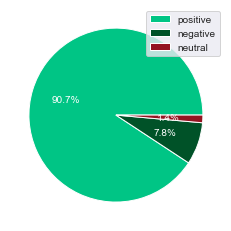

In [111]:
v_pol = df["V_Polarity"].value_counts()

plt.pie(x = v_pol,
       autopct='%1.1f%%', textprops=dict(color='white'))
plt.legend(labels = v_pol.index)

plt.show()

## Preprocessing the Training dataframe

In [112]:
df.drop(['Branch','index','Review_Text'],axis=1,inplace=True)

In [113]:
df.dtypes

Review_ID              int64
Rating                 int64
Reviewer_Location     object
Year                  object
Month                 object
Extracted_review      object
California             uint8
HongKong               uint8
Paris                  uint8
S_Polarity            object
VADER_score          float64
V_Polarity            object
dtype: object

### Performing Label Encoding on 'Reviewer Location' , 'Year', 'S_Polarity' and 'V_Polarity' columns

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
le = LabelEncoder()

In [116]:
for i in ['Reviewer_Location','Year','S_Polarity','V_Polarity']:
    df[i] = le.fit_transform(df[i])

### Converting the data of  'Month' column into numeric type

In [117]:
df["Month"] = pd.to_numeric(df["Month"])

In [118]:
df.dtypes

Review_ID              int64
Rating                 int64
Reviewer_Location      int32
Year                   int32
Month                  int64
Extracted_review      object
California             uint8
HongKong               uint8
Paris                  uint8
S_Polarity             int32
VADER_score          float64
V_Polarity             int32
dtype: object

In [119]:
df

Review_ID  Rating  Reviewer_Location  Year  Month  \
0      670772142       4                  8     9      4   
1      670682799       4                114     9      5   
2      670623270       4                151     9      4   
3      670607911       4                  8     9      4   
4      670607296       4                152     9      4   
...          ...     ...                ...   ...    ...   
40018   92198076       4                152     1      1   
40019   92061774       4                 50     1      1   
40020   91995748       1                152     0     12   
40021   91984642       2                152     0     12   
40022   91827418       5                152     0      9   

                                        Extracted_review  California  \
0      ever anywhere find hong kong similar layout wa...           0   
1      last time visit yet time stay tomorrowland aka...           0   
2      thanks god hot humid visiting park otherwise b...           0   
3      great compact park unfortunately quite bit mai...           0   
4      location city took hour kowlon kid much everyt...           0   
...                                                  ...         ...   
40018  pick prompt taxi driver wasnt sure time pickin...           0   
40019  returned day family trip boy aged reading prev...           0   
40020  spent dec park lunchtime attraction starting c...           0   
40021  well really looking forward trip christmas per...           0   
40022  staying hotel make good use extra hour fast pa...           0   

       HongKong  Paris  S_Polarity  VADER_score  V_Polarity  
0             1      0           2       0.7070           2  
1             1      0           2       0.9750           2  
2             1      0           2       0.9852           2  
3             1      0           2       0.6969           2  
4             1      0           2       0.2023           2  
...         ...    ...         ...          ...         ...  
40018         0      1           2      -0.8507           0  
40019         0      1           2       0.9955           2  
40020         0      1           0       0.8886           2  
40021         0      1           0       0.9089           2  
40022         0      1           2       0.8519           2  

[40023 rows x 12 columns]

## Review Analysis on the basis of Sentiment Polarity

In [120]:
X = df['Extracted_review']

In [121]:
X

0        ever anywhere find hong kong similar layout wa...
1        last time visit yet time stay tomorrowland aka...
2        thanks god hot humid visiting park otherwise b...
3        great compact park unfortunately quite bit mai...
4        location city took hour kowlon kid much everyt...
                               ...                        
40018    pick prompt taxi driver wasnt sure time pickin...
40019    returned day family trip boy aged reading prev...
40020    spent dec park lunchtime attraction starting c...
40021    well really looking forward trip christmas per...
40022    staying hotel make good use extra hour fast pa...
Name: Extracted_review, Length: 40023, dtype: object

In [122]:
X.shape

(40023,)

In [123]:
y = df['S_Polarity']

In [124]:
y

0        2
1        2
2        2
3        2
4        2
        ..
40018    2
40019    2
40020    0
40021    0
40022    2
Name: S_Polarity, Length: 40023, dtype: int32

In [125]:
y.shape

(40023,)

### Splitting the data

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

print(X_train.shape, X_test.shape) 
np.unique(y_train, return_counts=True) 

(32018,) (8005,)


(array([0, 1, 2]), array([ 2614,  3822, 25582], dtype=int64))

#### Using Tf-IDF Vectorizer

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [129]:
stop_words = stopwords.words('english')

vect = TfidfVectorizer(stop_words=stop_words).fit(X_train)
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<32018x30394 sparse matrix of type '<class 'numpy.float64'>'
	with 1483107 stored elements in Compressed Sparse Row format>

### Using Decision Tree classifier

In [130]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 100, random_state = 42)
dt.fit(X_train_vectorized, y_train)
print(dt.score(X_train_vectorized, y_train))
print(dt.score(vect.transform(X_test), y_test))

0.9860703354363171
0.7554028732042474


#### Training Accuracy : 98.60%

#### Testing Accuracy :  75.54%

### Using Random Forest classifier 

In [131]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 100, random_state = 42)
rf.fit(X_train_vectorized, y_train)
print(rf.score(X_train_vectorized, y_train))
print(rf.score(vect.transform(X_test), y_test))

0.958398400899494
0.8008744534665834


#### Training Accuracy : 95.83%

#### Testing Accuracy : 80.08%

### Using XGBoost classifier

In [132]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 100, random_state = 42)
xgb.fit(X_train_vectorized, y_train)
print(xgb.score(X_train_vectorized, y_train))
print(xgb.score(vect.transform(X_test), y_test))

C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
0.8342286071205497


#### Training Accuracy : 100%

#### Testing Accuracy : 83.42%

## Review Analysis on the basis of VADER Polarity

In [133]:
X = df['Extracted_review']

In [134]:
X

0        ever anywhere find hong kong similar layout wa...
1        last time visit yet time stay tomorrowland aka...
2        thanks god hot humid visiting park otherwise b...
3        great compact park unfortunately quite bit mai...
4        location city took hour kowlon kid much everyt...
                               ...                        
40018    pick prompt taxi driver wasnt sure time pickin...
40019    returned day family trip boy aged reading prev...
40020    spent dec park lunchtime attraction starting c...
40021    well really looking forward trip christmas per...
40022    staying hotel make good use extra hour fast pa...
Name: Extracted_review, Length: 40023, dtype: object

In [135]:
X.shape

(40023,)

In [136]:
y = df['V_Polarity']

In [137]:
y

0        2
1        2
2        2
3        2
4        2
        ..
40018    0
40019    2
40020    2
40021    2
40022    2
Name: V_Polarity, Length: 40023, dtype: int32

In [138]:
y.shape

(40023,)

### Splitting the data

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)

print(X_train.shape, X_test.shape) 
np.unique(y_train, return_counts=True) 

(32018,) (8005,)


(array([0, 1, 2]), array([ 2512,   452, 29054], dtype=int64))

#### Using Tf-IDF Vectorizer

In [140]:
stop_words = stopwords.words('english')

vect = TfidfVectorizer(stop_words=stop_words).fit(X_train)
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<32018x30391 sparse matrix of type '<class 'numpy.float64'>'
	with 1483226 stored elements in Compressed Sparse Row format>

### Using Decision Tree classifier

In [143]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 100, random_state = 42)
dt.fit(X_train_vectorized, y_train)
print(dt.score(X_train_vectorized, y_train))
print(dt.score(vect.transform(X_test), y_test))

0.99247298394653
0.8920674578388507


#### Training Accuracy : 99.24%

#### Testing Accuracy :  89.20%

### Using Random Forest classifier 

In [144]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 100, random_state = 42)
rf.fit(X_train_vectorized, y_train)
print(rf.score(X_train_vectorized, y_train))
print(rf.score(vect.transform(X_test), y_test))

0.9577425198325942
0.9075577763897564


#### Training Accuracy : 95.77%

#### Testing Accuracy :  90.75%

### Using XGBoost classifier

In [145]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 100, random_state = 42)
xgb.fit(X_train_vectorized, y_train)
print(xgb.score(X_train_vectorized, y_train))
print(xgb.score(vect.transform(X_test), y_test))

C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
0.9300437226733291


#### Training Accuracy : 100%

#### Testing Accuracy :  93.0%

## After performing the comparative analysis of different classfier models(Decision Tree,Random Forest, XGBoost), we can conclude that :-

- ### VADER Polarity is a better metric than Sentiment Polarity to analyse the sentiment of the extracted review texts
- ### XGBoost perfroms better than the other 2 models both when Sentiment Polarity and VADER Polarity is feeded. However it gives a better Train Accuracy(100%) and Test Accuracy(93%) when trained with VADER polarity  